In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
#import data 
df_train=pd.read_csv('train_loan.csv')

In [3]:
df_train.shape

(614, 13)

In [4]:
df_train.head(5)

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [5]:
df_train.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

In [6]:
df_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
#df_train['Property_Area'].unique()
#let see the frequency distribution of Property Area
df_train['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [8]:
#df_train['Credit_History'].unique()
#let see the frequency distribution of Credit History
df_train['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

# Distribution analysis

In [9]:
df_train['ApplicantIncome'].hist(bins=70)

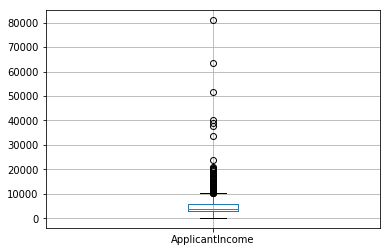

In [28]:
df_train.boxplot(column='ApplicantIncome')

This confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society. Part of this can be driven by the fact that we are looking at people with different education levels. Let us segregate them by Education:

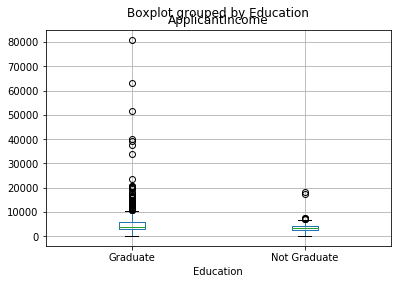

In [11]:
df_train.boxplot(column='ApplicantIncome',by = 'Education')

We can see that there is no substantial different between the mean income of graduate and non-graduates. But there are a higher number of graduates with very high incomes, which are appearing to be the outliers.

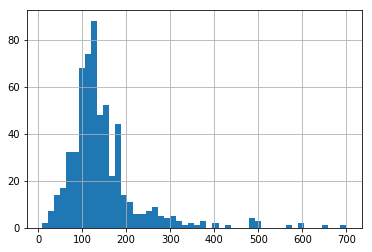

In [12]:
df_train['LoanAmount'].hist(bins=50)

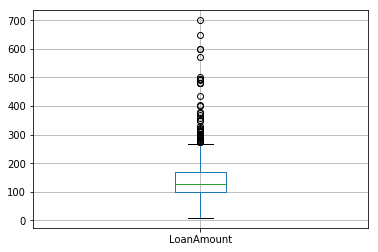

In [13]:
df_train.boxplot(column='LoanAmount')

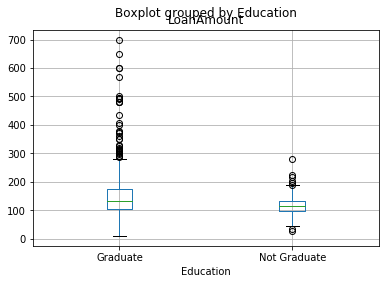

In [14]:
df_train.boxplot(column='LoanAmount',by = 'Education')

Again, there are some extreme values. Clearly, both ApplicantIncome and LoanAmount require some amount of data munging.

# Categorical variable analysis

In [10]:
temp1 = df_train['Credit_History'].value_counts(ascending=True)
temp2 = df_train.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print ('Frequency Table for Credit History:' )
print (temp1)

print ('\nProbility of getting loan for each Credit History class:' )
print (temp2)

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probility of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


Text(0.5,1,'Probability of getting loan by credit history')

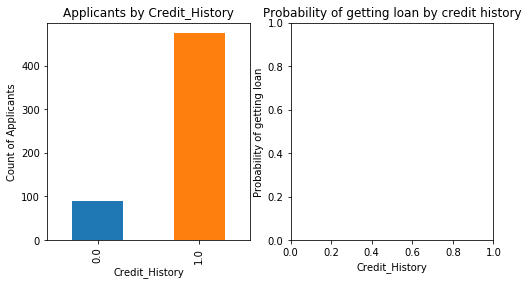

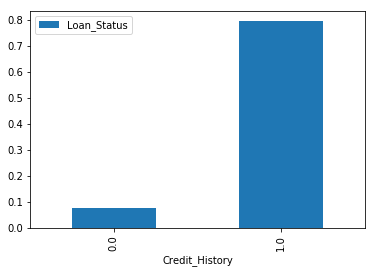

In [11]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")

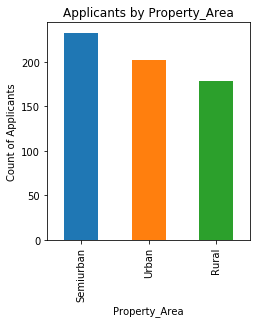

In [12]:
pro_temp=df_train['Property_Area'].value_counts()
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Property_Area')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Property_Area")
pro_temp.plot(kind='bar')

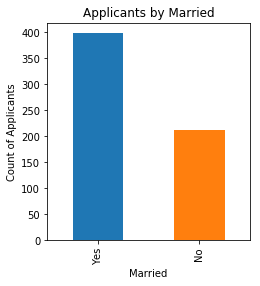

In [13]:
mar_temp=df_train['Married'].value_counts()
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Married')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Married")
mar_temp.plot(kind='bar')

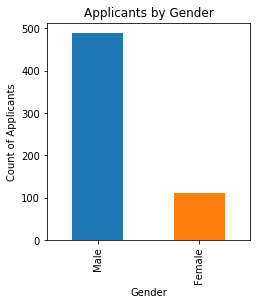

In [14]:
Gen_temp=df_train['Gender'].value_counts()
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Gender')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Gender")
Gen_temp.plot(kind='bar')

# Check missing values in the dataset

In [15]:
def num_missing(x):
  return sum(x.isnull())
#print (df_train.apply(num_missing, axis=1).head())
print (df_train.apply(num_missing, axis=0))

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [16]:
 df_train.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# How to fill missing values in LoanAmount?

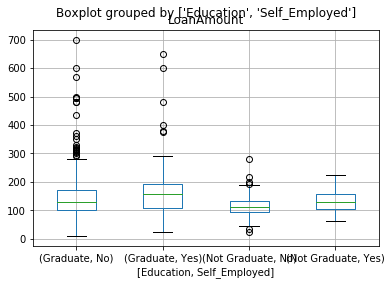

In [17]:
df_train.boxplot(column='LoanAmount',by = ['Education','Self_Employed'])

Thus we see some variations in the median of loan amount for each group and this can be used to impute the values. But first, we have to ensure that each of Self_Employed and Education variables should not have a missing values.

In [18]:
df_train['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

Since ~86% values are “No”, it is safe to impute the missing values as “No” as there is a high probability of success. This can be done using the following code:

In [19]:
df_train['Self_Employed'].fillna('No',inplace=True)

Now, we will create a Pivot table, which provides us median values for all the groups of unique values of Self_Employed and Education features. Next, we define a function, which returns the values of these cells and apply it to fill the missing values of loan amount:

In [20]:
impute_grps = df_train.pivot_table(values=["LoanAmount"], index=["Education","Self_Employed"], aggfunc=np.median)
print (impute_grps)

                            LoanAmount
Education    Self_Employed            
Graduate     No                  130.0
             Yes                 157.5
Not Graduate No                  113.0
             Yes                 130.0


In [21]:
df=df_train.copy()

In [22]:
table = df.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)
print(table)

Education      Graduate  Not Graduate
Self_Employed                        
No                130.0         113.0
Yes               157.5         130.0


In [23]:
df['LoanAmount'].sum()

86676.0

In [24]:
def fage(x):
 return table.loc[x['Self_Employed'],x['Education']]
# Replace missing values
df['LoanAmount'].fillna(df[df['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

In [31]:
df['LoanAmount'].sum()

89499.5

other way to do 

In [25]:
for i,row in df_train.loc[df_train['LoanAmount'].isnull(),:].iterrows():
  ind = tuple([row['Education'],row['Self_Employed']])
  df_train.loc[i,'LoanAmount'] = impute_grps.loc[ind].values[0]

In [26]:
df_train['LoanAmount'].sum()

89499.5

# How to treat for extreme values in distribution of LoanAmount and ApplicantIncome?

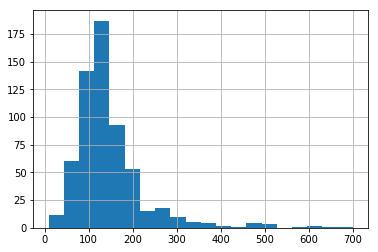

In [27]:
df_train['LoanAmount'].hist(bins=20)

Since the extreme values are practically possible, i.e. some people might apply for high value loans due to specific needs. So instead of treating them as outliers, let’s try a log transformation to nullify their effect:

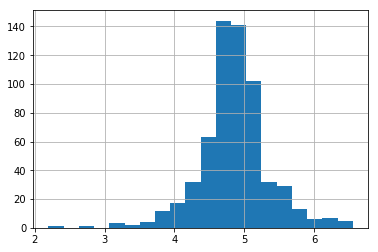

In [28]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided.
Coming to ApplicantIncome. One intuition can be that some applicants have lower income but strong support Co-applicants. So it might be a good idea to combine both incomes as total income and take a log transformation of the same.

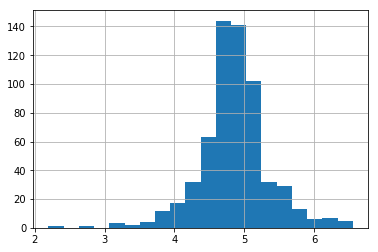

In [29]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['LoanAmount_log'].hist(bins=20) 

In [30]:
 df_train.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [31]:
 df.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log        0
TotalIncome           0
TotalIncome_log       0
dtype: int64

In [32]:
df.head(10)

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   
5  LP001011   Male     Yes          2      Graduate           Yes   
6  LP001013   Male     Yes          0  Not Graduate            No   
7  LP001014   Male     Yes         3+      Graduate            No   
8  LP001018   Male     Yes          2      Graduate            No   
9  LP001020   Male     Yes          1      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0       130.0             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   
5             5417             4196.0       267.0             360.0   
6             2333             1516.0        95.0             360.0   
7             3036             2504.0       158.0             360.0   
8             4006             1526.0       168.0             360.0   
9            12841            10968.0       349.0             360.0   

   Credit_History Property_Area Loan_Status  LoanAmount_log  TotalIncome  \
0             1.0         Urban           Y        4.867534       5849.0   
1             1.0         Rural           N        4.852030       6091.0   
2             1.0         Urban           Y        4.189655       3000.0   
3             1.0         Urban           Y        4.787492       4941.0   
4             1.0         Urban           Y        4.948760       6000.0   
5             1.0         Urban           Y        5.587249       9613.0   
6             1.0         Urban           Y        4.553877       3849.0   
7             0.0     Semiurban           N        5.062595       5540.0   
8             1.0         Urban           Y        5.123964       5532.0   
9             1.0     Semiurban           N        5.855072      23809.0   

   TotalIncome_log  
0         8.674026  
1         8.714568  
2         8.006368  
3         8.505323  
4         8.699515  
5         9.170872  
6         8.255569  
7         8.619750  
8         8.618305  
9        10.077819

In [33]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [42]:
df.loc[df['Gender'].isnull()].head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
23   LP001050    NaN     Yes          2  Not Graduate            No   
126  LP001448    NaN     Yes         3+      Graduate            No   
171  LP001585    NaN     Yes         3+      Graduate            No   
188  LP001644    NaN     Yes          0      Graduate           Yes   
314  LP002024    NaN     Yes          0      Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
23              3365             1917.0       112.0             360.0   
126            23803                0.0       370.0             360.0   
171            51763                0.0       700.0             300.0   
188              674             5296.0       168.0             360.0   
314             2473             1843.0       159.0             360.0   

     Credit_History Property_Area Loan_Status  LoanAmount_log  TotalIncome  \
23              0.0         Rural           N        4.718499       5282.0   
126             1.0         Rural           Y        5.913503      23803.0   
171             1.0         Urban           Y        6.551080      51763.0   
188             1.0         Rural           Y        5.123964       5970.0   
314             1.0         Rural           N        5.068904       4316.0   

     TotalIncome_log  
23          8.572060  
126        10.077567  
171        10.854431  
188         8.694502  
314         8.370084

In [34]:
df.loc[(df['Gender']=='Female') & (df['Self_Employed']=='No') & (df['Education']=='Graduate')].head()

Loan_ID  Gender Married Dependents Education Self_Employed  \
17  LP001036  Female      No          0  Graduate            No   
29  LP001087  Female      No          2  Graduate            No   
37  LP001112  Female     Yes          0  Graduate            No   
45  LP001137  Female      No          0  Graduate            No   
48  LP001146  Female     Yes          0  Graduate            No   

    ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
17             3510                0.0        76.0             360.0   
29             3750             2083.0       120.0             360.0   
37             3667             1459.0       144.0             360.0   
45             3410                0.0        88.0               NaN   
48             2645             3440.0       120.0             360.0   

    Credit_History Property_Area Loan_Status  LoanAmount_log  TotalIncome  \
17             0.0         Urban           N        4.330733       3510.0   
29             1.0     Semiurban           Y        4.787492       5833.0   
37             1.0     Semiurban           Y        4.969813       5126.0   
45             1.0         Urban           Y        4.477337       3410.0   
48             0.0         Urban           N        4.787492       6085.0   

    TotalIncome_log  
17         8.163371  
29         8.671287  
37         8.542081  
45         8.134468  
48         8.713582

In [35]:
from scipy.stats import mode
#mode(df['Gender'], axis=0)

df['Gender'].mode()[0]

'Male'

In [36]:
#Impute the values:

df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)



#Now check the #missing values again to confirm:
df.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log        0
TotalIncome           0
TotalIncome_log       0
dtype: int64

For instance, in this case, “Credit_History” is expected to affect the loan status significantly. This can be tested using cross-tabulation as shown below:

In [37]:
pd.crosstab(df["Credit_History"],df["Loan_Status"],margins=True)

Loan_Status       N    Y  All
Credit_History               
0.0              82    7   89
1.0              97  378  475
All             179  385  564

These are absolute numbers. But, percentages can be more intuitive in making some quick insights. We can do this using the apply function:

In [38]:
def percConvert(ser):
  #print(ser)
  return ser/float(ser[-1])
pd.crosstab(df["Credit_History"],df["Loan_Status"],margins=True).apply(percConvert, axis=1)

Loan_Status            N         Y  All
Credit_History                         
0.0             0.921348  0.078652  1.0
1.0             0.204211  0.795789  1.0
All             0.317376  0.682624  1.0

In [93]:
non_status=df.loc[(df['Loan_Status']=='N') & (df["Credit_History"].isnull()) & (df["Self_Employed"]=='No')]
non_status

Empty DataFrame
Columns: [Loan_ID, Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area, Loan_Status, LoanAmount_log, TotalIncome, TotalIncome_log]
Index: []

To check the Credit history of NaN  

In [39]:
df.loc[(df['Loan_Status']=='N') & (df["Credit_History"].isnull()) & (df["Self_Employed"]=='No'),['Credit_History']]=0.0

Updating above condition value with 0.0

In [40]:
df.loc[df['Credit_History'].isnull(),['Credit_History']]=1.0

updating other nan credit_status values with 1.0 

In [41]:
#df.loc[df['Credit_History'].fillna(1.0)]

df.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
LoanAmount_log        0
TotalIncome           0
TotalIncome_log       0
dtype: int64

In [43]:
#df["Dependents"].fillna(df["Dependents"].mean(), inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)

In [44]:
df.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

In [45]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
dtype: object

Since, sklearn requires all inputs to be numeric, we should convert all our categorical variables into numeric by encoding the categories. Before that we will fill all the missing values in the dataset. This can be done using the above code, 
Next, we will import the required modules. Then we will define a generic classification function, which takes a model as input and determines the Accuracy and Cross-Validation scores.

In [46]:
df.head()

Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0  LP001002       1        0           0          0              0   
1  LP001003       1        1           1          0              0   
2  LP001005       1        1           0          0              1   
3  LP001006       1        1           0          1              0   
4  LP001008       1        0           0          0              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0       130.0             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History  Property_Area  Loan_Status  LoanAmount_log  TotalIncome  \
0             1.0              2            1        4.867534       5849.0   
1             1.0              0            0        4.852030       6091.0   
2             1.0              2            1        4.189655       3000.0   
3             1.0              2            1        4.787492       4941.0   
4             1.0              2            1        4.948760       6000.0   

   TotalIncome_log  
0         8.674026  
1         8.714568  
2         8.006368  
3         8.505323  
4         8.699515

In [47]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [58]:
#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

  #Perform k-fold cross-validation with 5 folds
  kf = KFold(data.shape[0], n_folds=5)
  error = []
  print(kf)
  for train, test in kf:
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
  print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome]) 

# Logistic Regression

In [51]:
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 82.899%
sklearn.cross_validation.KFold(n=614, n_folds=5, shuffle=False, random_state=None)
Cross-Validation Score : 82.903%


In [65]:
#We can try different combination of variables:
predictor_var = ['Credit_History','Education','Married','Self_Employed','Property_Area']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 82.899%
sklearn.cross_validation.KFold(n=614, n_folds=5, shuffle=False, random_state=None)
Cross-Validation Score : 79.973%


Generally we expect the accuracy to increase on adding variables. But this is a more challenging case. The accuracy and cross-validation score are not getting impacted by less important variables. Credit_History is dominating the mode. We have two options now:
Feature Engineering: dereive new information and try to predict those. I will leave this to your creativity.
Better modeling techniques. Let’s explore this next.

# Decision Tree

In [61]:
model = DecisionTreeClassifier()
predictor_var = ['Credit_History','Gender','Married','Education']
outcome_var = 'Loan_Status'
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 82.899%
sklearn.cross_validation.KFold(n=614, n_folds=5, shuffle=False, random_state=None)
Cross-Validation Score : 82.903%


In [66]:
#We can try different combination of variables:
predictor_var = ['Credit_History','Loan_Amount_Term','LoanAmount_log']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 89.902%
sklearn.cross_validation.KFold(n=614, n_folds=5, shuffle=False, random_state=None)
Cross-Validation Score : 70.840%


Here we observed that although the accuracy went up on adding variables, the cross-validation error went down. This is the result of model over-fitting the data. Let’s try an even more sophisticated algorithm and see if it helps:

# Random Forest

An advantage with Random Forest is that we can make it work with all the features and it returns a feature importance matrix which can be used to select features.

In [67]:
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
        'LoanAmount_log','TotalIncome_log']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 100.000%
sklearn.cross_validation.KFold(n=614, n_folds=5, shuffle=False, random_state=None)
Cross-Validation Score : 79.971%


Here we see that the accuracy is 100% for the training set. This is the ultimate case of overfitting and can be resolved in two ways:
Reducing the number of predictors
Tuning the model parameters
Let’s try both of these. First we see the feature importance matrix from which we’ll take the most important features.


In [68]:
#Create a series with feature importances:
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print (featimp)

Credit_History      0.313298
TotalIncome_log     0.255858
LoanAmount_log      0.209426
Property_Area       0.046380
Dependents          0.046076
Loan_Amount_Term    0.041283
Married             0.025184
Education           0.021927
Gender              0.020466
Self_Employed       0.020101
dtype: float64


Let’s use the top 5 variables for creating a model. Also, we will modify the parameters of random forest model a little bit:


In [69]:
model = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
predictor_var = ['TotalIncome_log','LoanAmount_log','Credit_History','Dependents','Property_Area']
classification_model(model, df,predictor_var,outcome_var)


Accuracy : 84.365%
sklearn.cross_validation.KFold(n=614, n_folds=5, shuffle=False, random_state=None)
Cross-Validation Score : 82.252%
